# Project: Wrangle and Analyze Twitter Data
Yu Tao 12/26/2020

## Table of Contents
- Introduction
- Data Wrangling
    - Gathering Data
    - Assessing Data
        - Data Quality
        - Data Tidiness
    - Cleaning Data
- Data Analysis and Visualization
- Summary and Conclusion

## Introduction

The Twitter data from [**'WeRateDogs'**](https://twitter.com/dog_rates?lang=de) account has been analyzed in this project. First, I gathered the data from various sources, then I inspected the properties of the data and performed necessary data cleaning. With the cleaned data, I am able to analyze and visualize some interesting features and details from this Twitter account.

First of all, I will import in the cell below all the **libraries and modules** needed for this project.

In [10]:
# import all the packages needed for the project
# data analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests # download data
import re # text processing
import tweepy # using Twitter api
import json # json data processing

# display image from HTML
from IPython.display import HTML, display

import time

import warnings
warnings.filterwarnings('ignore')

## Data Wrangling
### Gathering Data

**(1) WeRateDogs Twitter archive**

First I downloaded a data file named '**twitter-archive-enhanced.csv**' from Udacity, which contains the WeRateDogs Twitter archive (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. I loaded it into a pandas dataframe called **df_twitter_archive**.

In [11]:
# load twitter-archive-enhanced csv
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# basic info of df_twitter_archive
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**(2) Tweet image predictions**

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (**image_predictions.tsv**) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL. The detail of obtaining the data is shown as follows:

In [13]:
# use url request to access data
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [14]:
# save the data to image_predictions.tsv
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [15]:
# load the tsv file as df_image_prediction dataframe
df_image_prediction = pd.read_csv('image_predictions.tsv', sep='\t' )
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The dataframe lists the basic infomation of the tweet image and three predictions of the object in the image with confidence level.

**(3) Additional Twitter Data**

There are extra twitter features from WeRateDogs that I will utilize in the analysis, e.g. each tweet's **retweet count and favorite ("like") count**. Next I used the Twitter api to fetch Twitter data from WeRateDogs (the alternative way is to download the tweet_json file directly from Udacity). In the below cell I only showed the basic method, there are more details on how to use Twitter API to get data via this link: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [8]:
# use the key and token from your API account to access the data
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
# use df_list to save additional twitter data
df_list = []
error_list = []

start_time = time.time()

# iterate through tweet id and save each tweet as a json file
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        # appending the tweets as json objects
        df_list.append(tweet._json)
        tweet = ""
    except:
        print("Tweet id: " + str(tweet_id) + " failed.")

with open ('tweet_json.txt', 'w') as outfile:
    json.dump(df_list, outfile)
    
print("Tweet information stored successfully!")
        
end_time = time.time()
print (end_time - start_time)

Tweet id: 888202515573088257 failed.
Tweet id: 873697596434513921 failed.
Tweet id: 872668790621863937 failed.
Tweet id: 872261713294495745 failed.
Tweet id: 869988702071779329 failed.
Tweet id: 866816280283807744 failed.
Tweet id: 861769973181624320 failed.
Tweet id: 856602993587888130 failed.
Tweet id: 851953902622658560 failed.
Tweet id: 845459076796616705 failed.
Tweet id: 844704788403113984 failed.
Tweet id: 842892208864923648 failed.
Tweet id: 837366284874571778 failed.
Tweet id: 837012587749474308 failed.
Tweet id: 829374341691346946 failed.
Tweet id: 827228250799742977 failed.
Tweet id: 812747805718642688 failed.
Tweet id: 802247111496568832 failed.
Tweet id: 779123168116150273 failed.
Tweet id: 775096608509886464 failed.
Tweet id: 771004394259247104 failed.
Tweet id: 770743923962707968 failed.
Tweet id: 759566828574212096 failed.


Rate limit reached. Sleeping for: 669


Tweet id: 754011816964026368 failed.
Tweet id: 680055455951884288 failed.


Rate limit reached. Sleeping for: 665


Tweet information stored successfully!
1955.787596464157


The gathering process takes **~30 min**, the **try-except** block helps us identify some twitter ids that we were not able to fetch the data. Now I have the additional twitter data saved as **tweet_json.txt**, I wrote it into a pandas dataframe called **df_tweet_json**.

In [16]:
# use a list to store the info extracted from tweet_json.txt
twitter_api = []

with open("tweet_json.txt", "r") as file:
    for line in file:
        try: 
            tweet = json.loads(line)           
            twitter_api.append({"tweet_id": tweet["id"],
                                "favorite_count": tweet["favorite_count"],
                                "retweet_count": tweet["retweet_count"],
                                "retweeted": tweet["retweeted"]})               
        except:
            print("reading line error")

# load twitter_api into a pandas dataframe
df_tweet_json = pd.DataFrame(twitter_api, columns = ["tweet_id", "favorite_count", "retweet_count", "retweeted"])
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count,retweeted
0,892420643555336193,39467,8853,False
1,892177421306343426,33819,6514,False
2,891815181378084864,25461,4328,False
3,891689557279858688,42908,8964,False
4,891327558926688256,41048,9774,False


### Assessing Data

The **quality and tidiness** of each dataframe are examined in detail, first I performed a quick visual assessment, by browsing twitter_archive_enhanced.csv and image_prediction.tsv in Excel and tweet_json.txt in text editor to get a general idea of the data, then I systematically assessed each of them using different Python commands shown in this section. A summary of data assessing is given at the end of this section.

##### df_twitter_archive

In [17]:
# check using info method
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We can see that there are many **missing values**, mainly in the columns related to reply and retweet. Since we are only interested in the original tweets, I will drop them later in the data cleaning section.

Another observation is that we also need to change the data type of the timestamp column to **datetime**.

In [18]:
# pick 5 sample rows
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209...,8,10,Edmund,None,None,pupper,None
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,None,None,None,None
339,832273440279240704,NaN,NaN,2017-02-16 17:00:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo,None,None,None
635,793601777308463104,NaN,NaN,2016-11-01 23:53:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dobby. I can't stop looking at her fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793601777...,12,10,Dobby,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None


We can see from the above 5 sample tweets that (1) not all the dogs in the posts have names; (2) WeRateDogs classifies dogs as doggo/floofer/pupper/puppo, but not all the dogs necessarily have a category.

In [19]:
# check whether duplicates exist
df_twitter_archive['tweet_id'].duplicated().sum()

0

Luckily we don't have duplicate entries. Now let's focus on the **rating numerator** (later on rating denominator), these dog ratings almost always have a denominator of 10. The numerators are almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent)

In [20]:
# count the rating numerator
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are various numerators, including 0 and some extraodinary large numbers, such as 1776, 960, etc. I would like to access the text of these tweets to see the details.

In [21]:
# access tweet text for specific numerators
pd.set_option('display.max_colwidth', -1)
print(df_twitter_archive.query("rating_numerator == '1776'").text)
print(df_twitter_archive.query("rating_numerator == '27'").text)
print(df_twitter_archive.query("rating_numerator == '1'").text)
print(df_twitter_archive.query("rating_numerator == '0'").text)

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object
763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object
605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1446    After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me                                       
1869    What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0                   
1940    The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you                                                    
2038    After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer 

From the text and corresponding links, 1776 is a valid numerator (the dog is in a US national flag to celebrate the country's establishment in year 1776). There are numerators, such as 0 or 1, because the pictures don't have dogs inside at all. Besides, there seems to be fractional numerators (maybe in denominator as well), such as 11.27/10, let's check.

In [22]:
# define pattern1, which represents fractional numbers that have decimals in the numerator
pattern1 = "(\d+\.\d*\/\d+)"
# search through the text for ratings with decimal numerators
with pd.option_context('max_colwidth', 200):
    display(df_twitter_archive[df_twitter_archive['text'].str.contains(pattern1)]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


There are 6 tweets and their ratings from the text have decimal numbers in the numerator. For example, there are **13.5/10, 9.75/10**, etc. I also found some errors in the **rating_numerator** cloumn, it falsely takes the number after the decimal point as the rating numerator instead of using the whole float number (e.g. should be 9.75, but is 75 actually), we need to clean this as well.

Now I will check the **rating_denominator** similarly.

In [23]:
# count the rating_denominator
df_twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

Almost all the denominators are 10 except a few ones with different values, let's check the original text for some of them.

In [24]:
# access tweet text for specific denominators
pd.set_option('display.max_colwidth', -1)
print(df_twitter_archive.query("rating_denominator == '170'").text)
print(df_twitter_archive.query("rating_denominator == '0'").text)

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


170 is a valid denominator as in 240/170 from the first text line above. There is also a 0 in the denominator, the text of which actually has two ratings. Based on the text, 13/10 seems to be the more appropriate rating. But it brings to us that we need to deal with **tweets with more than one ratings** properly in the clean section.

Similarly, I'd like to check for decimal denominators.

In [25]:
# pattern for decimal denominator
pattern2 = "(\d+\/\d+\.\d+)"
# search through the text for decimal denominator
with pd.option_context('max_colwidth', 200):
    display(df_twitter_archive[df_twitter_archive['text'].str.contains(pattern2)]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator


It's good news that **we don't have decimal denominators** in our tweet archive. As I mentioned before, there are multiple occurences of ratings in one tweet. Let's check.

In [26]:
# count for occurance of ratings in one text
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"
df_twitter_archive["rating_count"] = df_twitter_archive.text.str.count(pattern)
df_twitter_archive["rating_count"].value_counts()

1    2323
2    32  
3    1   
Name: rating_count, dtype: int64

We need to deal with **32 tweets with 2 ratings** in the text and **1 tweet with 3 ratings** in the text. One of the reasons for this is there might be more than one dogs in a picture.

In [27]:
# go through the texts of tweets with multiple ratings
df_twitter_archive[["text", "rating_count"]].query("rating_count != 1")

,text,rating_count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


Aside from having multiple dogs, some other objects in the pictures get rated as well (cats, human, etc.), resulting in more than 1 ratings.

Now I want to inspect the **name** column.

In [28]:
# count the names
df_twitter_archive.name.value_counts()

None            745
a               55 
Charlie         12 
Cooper          11 
Oliver          11 
Lucy            11 
Lola            10 
Tucker          10 
Penny           10 
Winston         9  
Bo              9  
the             8  
Sadie           8  
Daisy           7  
Toby            7  
Buddy           7  
an              7  
Bailey          7  
Koda            6  
Milo            6  
Dave            6  
Jack            6  
Jax             6  
Stanley         6  
Scout           6  
Oscar           6  
Leo             6  
Rusty           6  
Bella           6  
Gus             5  
               ..  
Damon           1  
Flurpson        1  
Filup           1  
unacceptable    1  
Gilbert         1  
Lipton          1  
Bodie           1  
Jaycob          1  
Huxley          1  
Millie          1  
Bruno           1  
Baron           1  
Hall            1  
Shikha          1  
Josep           1  
Rhino           1  
Stella          1  
Jeremy          1  
Tino            1  


There is an issue associated with the name column, it contains **wrong names like "a", "the", "an"**.

Next I will inspect the **dog_type** infomation (doggo/floofer/pupper/puppo) and see how often they appear in the twitter archive.

In [29]:
# count each of the dog_type
df_twitter_archive["doggo"].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [30]:
df_twitter_archive["floofer"].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [31]:
df_twitter_archive["pupper"].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [32]:
df_twitter_archive["puppo"].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [33]:
# fractions of classified dog_type over all the tweets
print (97/2356, 10/2356, 257/2356, 30/2356)

0.041171477079796265 0.004244482173174873 0.10908319185059423 0.012733446519524618


Only a small fraction of the dogs (from 0.4% to 10.9%) got corresponding dog types in these column, I think we should **combine dog type columns** into one for simplicity.

##### df_image_prediction

In [34]:
# info of the df_image_prediction dataframe
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In terms of missing values, the df_image_prediction looks fine.

In [35]:
# pick 10 samples
df_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True


The predictions (p1, p2, p3) are **sometimes in lower case, sometimes in upper case** (connected by underscores), we should edit these strings to make them consistent. Besides, **not all the predictions are dogs**, they can be other objects (vacuum, sea_lion) that we need to deal with.

To find whether there are **duplicates** in the image_prediction, we can look at the jpg_url column.

In [36]:
# duplicates in the dataframe by image url
df_image_prediction.jpg_url.duplicated().sum()

66

In [37]:
# duplicates in the dataframe by tweet id
df_image_prediction.tweet_id.duplicated().sum()

0

In [38]:
# appearance of identical image in df_image_prediction
df_image_prediction.jpg_url.value_counts().head()

https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
Name: jpg_url, dtype: int64

In [39]:
# one duplicate example from the first link in the above cell outcome
df_image_prediction[df_image_prediction.jpg_url == "https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1492,782969140009107456,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True


In df_image_prediction, we need to deal with **66 duplicate entries**. However, we are lucky since these duplicate predictions are actually coming from retweet/reply, given there are no duplicates based on tweet id but only on url.

Let's count rows which predictions are not dogs at all.

In [40]:
# rows that all three predictions are not dogs
df_image_prediction.query("p1_dog == False and p2_dog == False and p3_dog == False").count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

There are **324 rows**, the predictions of which don't have any dog at all. 

In [41]:
# for each prediction, whether it's predicting dog or not
print(df_image_prediction.p1_dog.value_counts())
print(df_image_prediction.p2_dog.value_counts())
print(df_image_prediction.p3_dog.value_counts())

True     1532
False    543 
Name: p1_dog, dtype: int64
True     1553
False    522 
Name: p2_dog, dtype: int64
True     1499
False    576 
Name: p3_dog, dtype: int64


**There are rows that don't predict the object in the image as a dog**. The reasons are (1) the dogs are sometimes in the background; (2) the pictures don't have any dogs at all. Because we only want tweets with dogs, so we might drop non-dog rows in the cleaning section later.

##### df_tweet_json

In [42]:
# tweet_json info
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.5 KB


In [43]:
# count duplicates
df_tweet_json.tweet_id.duplicated().sum()

0

For df_tweet_json, we **don't have any missing values or duplicates**.

In [44]:
# 5 samples from tweet_json
df_tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,retweeted
1608,685532292383666176,3336,1298,False
1208,715680795826982913,4719,1813,False
89,874680097055178752,28439,4875,False
217,850333567704068097,3647,367,False
1781,677673981332312066,3603,1677,False


In [45]:
df_tweet_json.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

For the tweets in df_tweet_json, they are all **not from retweet**. Overall, tweet_json data looks fine.

##### Assessing Summary (11 quality issues and 2 tidiness issues)
**quality (completeness, validity, accuracy, consistency):**

**df_twitter_archive:**
- there are missing values in the dataframe to deal with.
- there are retweets and replies in the dataframe that we're not interested in.
- the data type of timestamp should be change to datetime.
- some ratings are not correctly extracted from the text, especially when the rating numerator is a float number. 
- sometimes there are more than one ratings for single tweet.
- some of the dog names are wrong (with names like 'a', 'the', 'an').
- many of the dogs don't have a dog type (doggo/floofer/pupper/puppo).

**df_image_prediction:**
- there are duplicate predictions from retweets that we're not interested in.
- some pictures got predicted even though they don't show dogs.
- the prediction results are inconsistent in using lower/upper case letters.
- we should condense the 3 predictions into one based on the confidence level, it's redundent to analyze prediction with low confidence.

**df_tweet_json:** this dataframe looks fine overall.

**Tidiness summary:**

**df_twitter_archive:**
- the four columns (doggo/floofer/pupper/puppo) should be combined into one because there are lots of 'None' values, it also makes the analysis easier.

**df_image_prediction:** this dataframe looks fine overall.

**df_tweet_json:**: this dataframe looks fine overall.

**others:**
- we should merge the three tables since they share tweet_id, it helps with analysis as well, e.g. we can easily compare tweet likes and dog ratings. 

### Cleaning Data

Based on the quality and tidiness of the three dataframes (df_twitter_archive, df_image_prediction, df_tweet_json), I figured out the following **data cleaning steps:**
- first, merge the three dataframes by tweet_id, which makes data cleaning easier to perform. e.g. if I'm to remove retweets from df_twitter_archive, I will have to do it for df_image_prediction as well. However, for the merged dataframe I only need to do this cleaning step once.
- drop rows with missing values if they are not important for analysis.
- change the data type of timestamp to datetime.
- drop all the data related to reply or retweet.
- drop columns we don't need for analysis.
- correct the rating numerators, drop the row if there are multiple ratings.
- fix the name if it's "the, a, an, etc.",
- combine the dog type columns (doggo/floofer/pupper/puppo) into one column.
- drop rows without image or image without dogs, extract the best dog prediction and confidence for each tweet.

I will use the **define-code-test** procedure to process each cleaning step.

**Define**
- **Merge three dataframes**

**Code**

In [46]:
# make backup copies of three dataframes
df_twitter_archive_copy = df_twitter_archive.copy()
df_image_prediction_copy = df_image_prediction.copy()
df_tweet_json_copy = df_tweet_json.copy()

In [47]:
# merge three dataframes into df_all
df_all = pd.merge(df_twitter_archive_copy, df_image_prediction_copy, on = "tweet_id", how = "outer")
df_all = pd.merge(df_all, df_tweet_json_copy, on = "tweet_id", how = "outer")

**Test**

In [48]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating_count                  23

**Define**
- **Remove retweets**

**Code**

In [49]:
# choose all the tweets without retweeted_status_id
df_all = df_all[df_all["retweeted_status_id"].isnull()]

**Test**

In [50]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
rating_count                  2175 non

In [51]:
# check retweeted column to see if they are all false
df_all['retweeted'].value_counts()

False    2175
Name: retweeted, dtype: int64

**Define**
- **Remove replies**

**Code**

In [52]:
# similarly we only want tweets without reply status
df_all = df_all[df_all["in_reply_to_status_id"].isnull()]

**Test**

In [53]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
rating_count                  2097 non-n

In [54]:
# double check we don't have tweets from reply
df_all.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

**Define**
- **Drop unnecessary columns**

**Code**

In [55]:
# drop columns we don't need
df_all.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
             "retweeted_status_user_id", "retweeted_status_timestamp", "retweeted"],
            axis = 1, inplace = True)

**Test**

In [56]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
rating_count          2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-nul

**Define**
- **Drop rows without image**

**Code**

In [57]:
# get rid of rows without image
df_all.dropna(subset = ["jpg_url"], inplace = True)

**Test**

In [58]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
rating_count          1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-nul

After finishing the previous steps, I found the dataframe now has **no missing values**, which is a good news.

**Define**
- **Drop tweets that don't predict dogs in any of the 3 predictions**

**Code**

In [59]:
df_all.drop(df_all.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

**Test**

In [60]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
rating_count          1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non-nul

**Define**
- **Fix duplicate images in image prediction**

**Code/Test**

In [61]:
df_all.jpg_url.duplicated().sum()

0

Since the duplicate images are from retweets and replies, it should already been removed after we dropped the retweets and replies, and it's true from the outcome above, we no longer have duplicate image predictions.

**Define**
- **Fix wrong numerators**

**Code**

In [62]:
# how many wrong numerators left in df_all now (4)
pattern1 = "(\d+\.\d*\/\d+)"
with pd.option_context('max_colwidth', 200):
    display(df_all[df_all['text'].str.contains(pattern1)]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


I will first extract the correct ratings from the original text of these 4 tweets.

In [63]:
# extract the ratings from the original text
df_all["text"].str.extract(pattern1, expand = True)[0].dropna()

45      13.5/10 
695     9.75/10 
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

The correct rating numerators for these tweets at float numbers. To solve this issue, I changed the column type for rating numerator and denominator to **'float'**.

In [64]:
df_all.rating_numerator = df_all.rating_numerator.astype("float64")
df_all.rating_denominator = df_all.rating_denominator.astype("float64")

In [65]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null float64
rating_denominator    1666 non-null float64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
rating_count          1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-null float64
p2_dog                1666 non

I decided to manually fix them since we only have 4 wrong entries.

In [66]:
# correct the rating numerators manually by tweet_id from previous cells
df_all.loc[(df_all.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_all.loc[(df_all.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_all.loc[(df_all.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_all.loc[(df_all.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

**Test**

In [67]:
# check to make sure the rating numerators are right now
with pd.option_context('max_colwidth', 200):
    display(df_all[df_all['text'].str.contains(pattern1)]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


The issue of rating numerators is solved, the other issue remains is that there are tweets with multiple ratings (on multiple dogs, or other object). I will simply drop them out.

**Define**
- **Drop tweets with multiple ratings**

**Code**

In [68]:
# query tweets with two or more ratings
df_all[["text", "rating_count"]].query("rating_count != 1")

,text,rating_count
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,2
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,2
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,2
1525,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,2


In [69]:
# drop tweets with multiple ratings
df_all.drop(df_all.query("rating_count != 1").index, inplace = True)

**Test**

In [70]:
# double check they are dropped
df_all[["text", "rating_count"]].query("rating_count != 1")

,text,rating_count


In [71]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null object
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
rating_count          1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null float64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               1640 non-null float64
p2_dog                1640 non

**Define**
- **Combine dog stage columns into one column named 'dog_stage'**

**Code**

In [72]:
# find how many dogs are classfied in each of the dog stage
print (df_all[df_all['text'].str.contains('doggo')].shape[0])
print (df_all[df_all['text'].str.contains('floofer')].shape[0])
print (df_all[df_all['text'].str.contains('pupper')].shape[0])
print (df_all[df_all['text'].str.contains('puppo')].shape[0])

64
3
182
27


I will replace all the 'None' as '', then concatenate four columns using string addition, store the final string into a column called dog_stage.

In [73]:
for _ in ["doggo", "floofer", "pupper", "puppo"]:
    df_all[_].replace("None", "", inplace = True)

df_all['dog_stage'] = df_all['doggo'].map(str) + df_all['floofer'].map(str) + df_all['pupper'].map(str) + df_all['puppo'].map(str)
df_all["dog_stage"].replace("", 'None', inplace = True)

In [74]:
df_all['dog_stage'].value_counts()

None            1385
pupper          164 
doggo           54  
puppo           21  
doggopupper     7   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

It's interesting that there are dogs in more than one categories, because we have dog_stage like doggopupper, let's check the details of these 9 rows.

In [75]:
# 9 rows has multiple stages
df_all[['text', 'dog_stage']].query("dog_stage == 'doggopupper' or dog_stage == 'doggofloofer' or dog_stage == 'doggopuppo'")

,text,dog_stage
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggopupper
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper


I read through the text and extracted the correct dog_stage based on the pictures, the results are as follows.

In [77]:
# handle multiple stages
df_all.loc[df_all.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_all.loc[df_all.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_all.loc[df_all.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_all.loc[df_all.dog_stage == '', 'dog_stage'] = 'None'

In [78]:
# recheck the dog_stage, now they are all correct
df_all['dog_stage'].value_counts()

None              1385
pupper            164 
doggo             54  
puppo             21  
doggo, pupper     7   
floofer           7   
doggo, puppo      1   
doggo, floofer    1   
Name: dog_stage, dtype: int64

In [79]:
# drop the 'doggo','floofer','pupper','puppo' columns
df_all = df_all.drop(['doggo','floofer','pupper','puppo'], axis=1)
df_all['dog_stage'].fillna('None', inplace=True)

**Test**

In [80]:
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0,None


**Define**
- **Fix wrong names (replace with None)**

**Code**

I read through all the dog names and the wrong names all start in lower cases, which are easy to pick out, I made them into a list called wrong_name_list as follows.

In [81]:
# remove wrong names
wrong_name_list = ['a', 'the', 'an', 'very', 'quite', 'just', 'one', 'getting', 'actually', 'no', 'mad', 'old', 'by',
                  'his', 'such', 'infuriating', 'light', 'all', 'space', 'my', 'unacceptable', 'life', 'this', 'officially']
# replace wrong names with None
for _ in wrong_name_list:
    df_all['name'].replace(_, 'None', inplace = True)

**Test**

In [82]:
# double check the names
df_all['name'].value_counts()

None        467
Cooper      10 
Lucy        10 
Charlie     10 
Oliver      9  
Tucker      9  
Penny       8  
Winston     7  
Sadie       7  
Daisy       7  
Jax         6  
Toby        6  
Lola        6  
Koda        6  
Rusty       5  
Stanley     5  
Oscar       5  
Bo          5  
Leo         5  
Bella       5  
Jack        4  
Bear        4  
Duke        4  
Oakley      4  
Louis       4  
Maggie      4  
Finn        4  
Winnie      4  
Milo        4  
Sophie      4  
           ..  
Kaiya       1  
Meyer       1  
Mary        1  
Jarod       1  
Dewey       1  
Bodie       1  
Lipton      1  
Hall        1  
Baron       1  
Tyrone      1  
Pete        1  
Clybe       1  
Dutch       1  
Butter      1  
Levi        1  
Coopson     1  
Sweet       1  
Vinscent    1  
Bell        1  
Joshwa      1  
Bruno       1  
Timison     1  
Ron         1  
Gordon      1  
Bloo        1  
Tyrus       1  
Logan       1  
Ralphus     1  
Millie      1  
Shooter     1  
Name: name, Length: 822,

In [83]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 23 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null object
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
rating_count          1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null float64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               1640 non-null float64
p2_dog                1640 non-null object
p3                    1640 non-null object
p3_conf               1640 non-null float64
p3_dog                1640 non-null object
favorite_count        1640 no

**Define**
- **Use the best predictions and remove others**

**Code**

In [84]:
# check p1 has the highest value (first prediction is the most accurate)
df_all.query("(p2_conf > p1_conf) or (p3_conf > p1_conf)")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage


In [85]:
# I will use the most confident breed and condidence instead of 3 predictions
# define a function that returns the most confident prediction that is dog
attributes1 = ["p1_dog", "p1", "p2_dog", "p2", "p3_dog", "p3"]
attributes2 = ["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_dog", "p3_conf"]
def dog_breed(list):
    if list[0] == True:
        return list[1]
    elif list[2] == True:
        return list[3]
    else:
        return list[5]

# add two columns called breed and confidence to store predictions 
df_all["breed"] = df_all[attributes1].apply(dog_breed, axis = 1)
df_all["confidence"] = df_all[attributes2].apply(dog_breed, axis = 1)

In [86]:
# drop original prediction columns
attributes = ["p1", "p1_dog", "p1_conf", "p2", "p2_dog", "p2_conf", "p3", "p3_dog", "p3_conf"]
df_all.drop(attributes, inplace = True, axis = 1)
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_count,jpg_url,img_num,favorite_count,retweet_count,dog_stage,breed,confidence
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,33819.0,6514.0,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,25461.0,4328.0,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,42908.0,8964.0,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,41048.0,9774.0,None,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,20562.0,3261.0,None,Chesapeake_Bay_retriever,0.425595


**Test**

In [87]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 16 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null object
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
rating_count          1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null float64
favorite_count        1640 non-null float64
retweet_count         1640 non-null float64
dog_stage             1640 non-null object
breed                 1640 non-null object
confidence            1640 non-null float64
dtypes: float64(6), int64(2), object(8)
memory usage: 217.8+ KB


**Define**
- **Make the format in breed column consistent**

**Code**

In [88]:
# for all the entries, use lower case letters and replace '_' with ' '
df_all['breed'] = df_all['breed'].str.lower()
df_all['breed'] = df_all['breed'].str.replace("_", " ")

**Test**

In [89]:
# count the breed
df_all['breed'].value_counts()

golden retriever                  154
labrador retriever                105
pembroke                          93 
chihuahua                         87 
pug                               62 
toy poodle                        50 
chow                              48 
samoyed                           42 
pomeranian                        39 
malamute                          33 
french bulldog                    31 
chesapeake bay retriever          29 
cocker spaniel                    29 
miniature pinscher                24 
eskimo dog                        22 
cardigan                          21 
german shepherd                   21 
staffordshire bullterrier         20 
beagle                            20 
shih-tzu                          20 
siberian husky                    19 
rottweiler                        18 
maltese dog                       18 
shetland sheepdog                 18 
italian greyhound                 17 
basset                            17 
kuvasz      

**Define**
- **Correct the timestamp data type to datetime**

**Code**

In [90]:
# change timestamp data type
df_all["timestamp"] = pd.to_datetime(df_all.timestamp)

for _ in ["retweet_count", "favorite_count", "img_num"]:
    df_all[_] = df_all[_].astype("int64")

In [91]:
# reset the index
df_all.reset_index(drop = True, inplace = True)

**Test**

In [92]:
df_all.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_count,jpg_url,img_num,favorite_count,retweet_count,dog_stage,breed,confidence
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,33819,6514,None,chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,25461,4328,None,chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,42908,8964,None,labrador retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,41048,9774,None,basset,0.555712
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,20562,3261,None,chesapeake bay retriever,0.425595


In [93]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 16 columns):
tweet_id              1640 non-null int64
timestamp             1640 non-null datetime64[ns, UTC]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
rating_count          1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
favorite_count        1640 non-null int64
retweet_count         1640 non-null int64
dog_stage             1640 non-null object
breed                 1640 non-null object
confidence            1640 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(5), object(7)
memory usage: 205.1+ KB


The data has been cleaned, I will save it as a csv file named **'twitter_archive_master.csv'**

In [94]:
df_all.to_csv('twitter_archive_master.csv', index = False)

### Data Analysis and Visualization

In this section, I will provide some insights and visualizations on the WeRateDogs twitter dataframe, based on the following questions I came up with:
- what are the dog breeds with the most tweets?
- what are the dog breeds with the highest average ratings?
- what are the dog breeds with the most numbers of favorites or retweets?
- what are the distributions of the rating, favorite_count and retweet_count?
- what is the relation between the average rating and favorite/retweet counts for different dog breeds.
- what is the most liked/retweeted single tweet?
- what is the average favorite/retweet count on different dog_stage?
- what is the WeRateDogs account activity by year, month, day of the week, hour of the day?
- what is the distribution of favorite counts by month in each year?

In [95]:
# copy the df_all dataframe in case
df_all_copy = df_all.copy()

**1. what are the dog breeds with the most tweets?**

In [96]:
# groupby breed and count number of tweets respectively
# save the top 20 most tweeted breeds in df_breed
df_breed = df_all_copy.groupby('breed')['tweet_id'].count().sort_values(ascending=False)[0:20]
sorted_index = df_breed.index
df_breed

breed
golden retriever             154
labrador retriever           105
pembroke                     93 
chihuahua                    87 
pug                          62 
toy poodle                   50 
chow                         48 
samoyed                      42 
pomeranian                   39 
malamute                     33 
french bulldog               31 
chesapeake bay retriever     29 
cocker spaniel               29 
miniature pinscher           24 
eskimo dog                   22 
german shepherd              21 
cardigan                     21 
shih-tzu                     20 
beagle                       20 
staffordshire bullterrier    20 
Name: tweet_id, dtype: int64

In [97]:
# convert df_breed pandas series to dataframe
df_breed = pd.DataFrame(df_breed)
df_breed = df_breed.reset_index()
df_breed.columns = ['dog_breed', 'tweet_counts']
df_breed.head()

,dog_breed,tweet_counts
0,golden retriever,154
1,labrador retriever,105
2,pembroke,93
3,chihuahua,87
4,pug,62


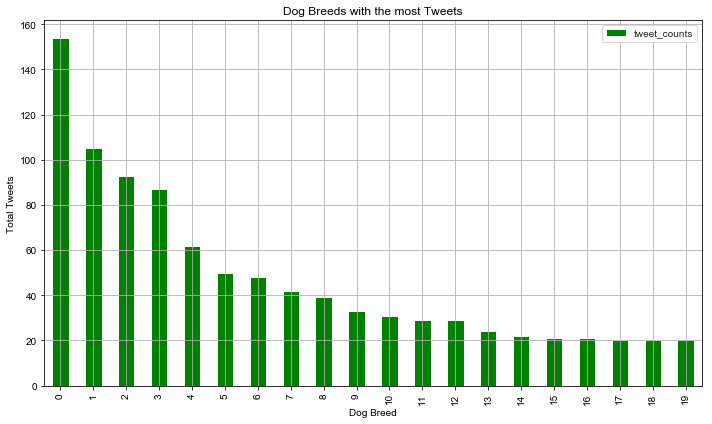

In [98]:
# visualize the top 20 most tweeted breeds
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
# create a new bar char
ax = df_breed.plot.bar(ax=ax, color = 'g')
ax.set_title('Dog Breeds with the most Tweets')
ax.set_xlabel("Dog Breed")
ax.set_ylabel('Total Tweets')
plt.tight_layout()

The above plot shows the 20 breeds with the most tweets, the top 3 of them are **golden retriever (tweeted 154 times), labrador retriever (105) and pembroke (93)**.

**2. what are the dog breeds with the highest average ratings?**

In [99]:
# add a column 'decimal rating', which is rating numerator divided by denominator
df_all_copy['decimal_rating'] = df_all_copy['rating_numerator'] / df_all_copy['rating_denominator']
df_all_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating_count,jpg_url,img_num,favorite_count,retweet_count,dog_stage,breed,confidence,decimal_rating
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,33819,6514,None,chihuahua,0.323581,1.3
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,25461,4328,None,chihuahua,0.716012,1.2
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,42908,8964,None,labrador retriever,0.168086,1.3
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,41048,9774,None,basset,0.555712,1.2
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,20562,3261,None,chesapeake bay retriever,0.425595,1.3


In [100]:
# function to find average rating given dog breed
def average_rating (dog_breed):
    breed_rating = df_all_copy.query('breed == @dog_breed')['decimal_rating'].mean()
    return breed_rating

In [101]:
# add to df_breed an average rating column
df_breed['average_rating'] = df_breed['dog_breed'].apply(lambda p : average_rating(p))
df_breed.sort_values('average_rating', ascending=False, inplace=True)
df_breed.head()

,dog_breed,tweet_counts,average_rating
0,golden retriever,154,1.177783
7,samoyed,42,1.169048
2,pembroke,93,1.144086
6,chow,48,1.141667
14,eskimo dog,22,1.140909


In [102]:
# 10 dogs with the highest avg rating
df_rating_top_10 = df_breed.sort_values('average_rating', ascending=False)[:10]
df_rating_top_10

,dog_breed,tweet_counts,average_rating
0,golden retriever,154,1.177783
7,samoyed,42,1.169048
2,pembroke,93,1.144086
6,chow,48,1.141667
14,eskimo dog,22,1.140909
12,cocker spaniel,29,1.131034
1,labrador retriever,105,1.120000
10,french bulldog,31,1.119355
16,cardigan,21,1.114286
5,toy poodle,50,1.100000


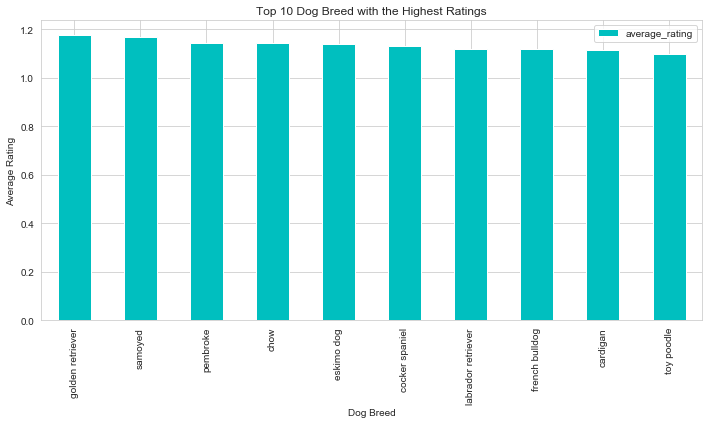

In [103]:
# visualze breeds with the highest average ratings
ax = df_rating_top_10.plot.bar(x='dog_breed', y='average_rating', color = 'c', figsize=(10,6))
ax.set_title('Top 10 Dog Breed with the Highest Ratings')
plt.ylabel("Average Rating")
ax.set_xlabel('Dog Breed')
plt.tight_layout()

The plot above gives ten dog breeds with the highest average ratings, the top 3 breeds and ratings are: **golden retriever (1.178), samoyed (1.169) and pembroke (1.144)**.

**3. what are the dog breeds with the most numbers of favorites or retweets?**

In [104]:
# functions to sum over favorites and retweets given breed
def favorite_count (dog_breed):
    fav_count = df_all_copy.query('breed == @dog_breed')['favorite_count'].sum()
    return fav_count
def retweet_count (dog_breed):
    ret_count = df_all_copy.query('breed == @dog_breed')['retweet_count'].sum()
    return ret_count

In [105]:
# add favorite counts to each breed in df_breed
df_breed['favorite_counts'] = df_breed['dog_breed'].apply(lambda p : favorite_count(p))
df_breed.sort_values('favorite_counts', ascending=False, inplace=True)
df_breed.head()

,dog_breed,tweet_counts,average_rating,favorite_counts
0,golden retriever,154,1.177783,1915088
1,labrador retriever,105,1.120000,1264586
2,pembroke,93,1.144086,1036756
3,chihuahua,87,1.055172,714274
7,samoyed,42,1.169048,583906


In [106]:
# add retweet counts to each breed in df_breed
df_breed['retweet_counts'] = df_breed['dog_breed'].apply(lambda p : retweet_count(p))
df_breed.sort_values('retweet_counts', ascending=False, inplace=True)
df_breed.head()

,dog_breed,tweet_counts,average_rating,favorite_counts,retweet_counts
0,golden retriever,154,1.177783,1915088,573953
1,labrador retriever,105,1.120000,1264586,405163
2,pembroke,93,1.144086,1036756,291262
3,chihuahua,87,1.055172,714274,234198
7,samoyed,42,1.169048,583906,203446


Text(0.5, 1.0, 'Breed Favorite Counts Ranking')

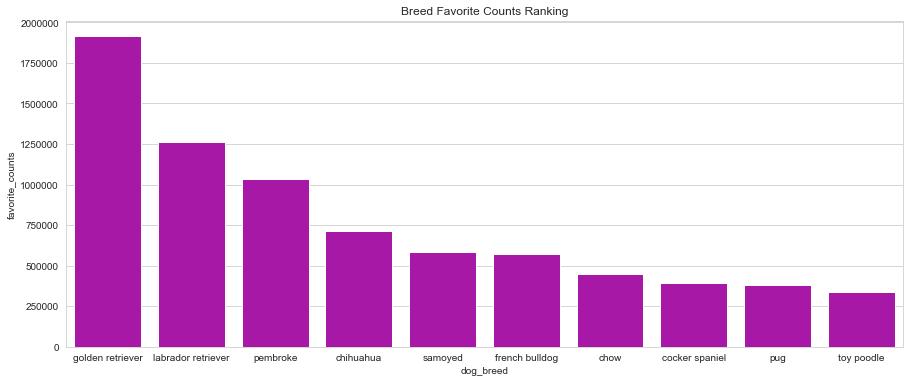

In [107]:
# visualize favorite counts
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = "dog_breed", y = "favorite_counts", data = df_breed.sort_values("favorite_counts", ascending=False).iloc[:10], color = 'm')
ax.set_title("Breed Favorite Counts Ranking")

Text(0.5, 1.0, 'Breed Retweet Counts Ranking')

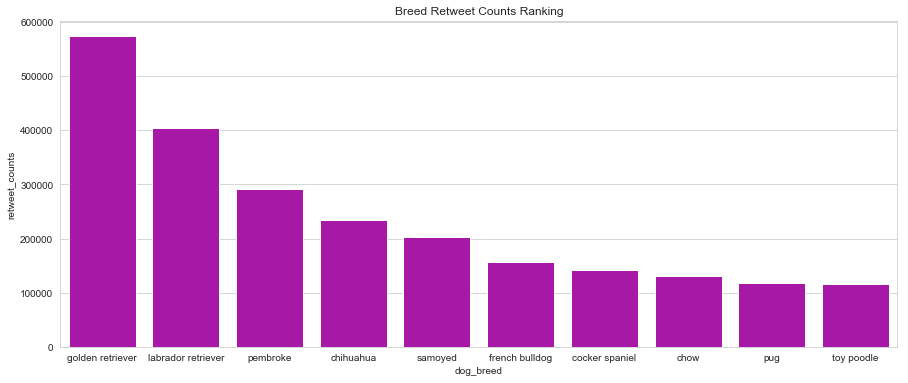

In [108]:
# visualize retweet counts
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = "dog_breed", y = "retweet_counts", data = df_breed.sort_values("retweet_counts", ascending=False).iloc[:10], color = 'm')
ax.set_title("Breed Retweet Counts Ranking")

**Golden retriever (1915008 favorites, 573953 retweets), labrador retriever (1264586 favorites, 405163 retweets), pembroke (1036756 favorites, 291262 retweets) are top 3 on both favorite and retweet lists.**

**4. what are the distributions of the rating, favorite_count and retweet_count?**

In [109]:
# statistics on rating, favorite and retweet
df_all_copy[['decimal_rating', 'favorite_count', 'retweet_count']].describe()

,decimal_rating,favorite_count,retweet_count
count,1640.000000,1640.000000,1640.000000
mean,1.085858,9371.344512,2853.065854
std,0.185706,12699.965595,4850.693086
min,0.000000,81.000000,16.000000
25%,1.000000,2243.000000,664.750000
50%,1.100000,4534.000000,1460.500000
75%,1.200000,11851.500000,3270.750000
max,3.428571,132810.000000,79515.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020353E11DD8>,
      dtype=object)

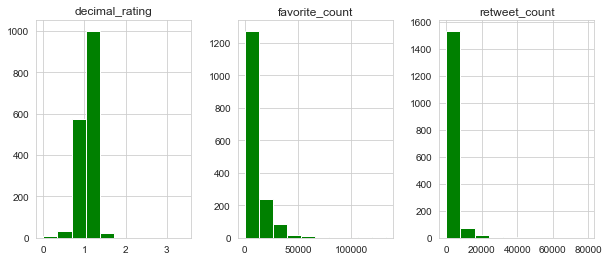

In [110]:
# plot 3 histograms
df_all_copy[['decimal_rating', 'favorite_count', 'retweet_count']].hist(figsize = (10, 4), layout = (1, 3), color = 'g')

**The average rating on dogs is 1.09, with a min rating of 0.00 and a max rating of 3.43. The interquatile range is 1.00 to 1.20.**

**The average favorite count of all tweets is 9371, with a min count of 81 and a max count of 132810. The interquatile range is 2243 to 11852.**

**The average retweet count of all tweets is 2853, with a min count of 16 and a max count of 79515. The interquatile range is 665 to 3271.**

**5. what is the relation between the average rating and favorite/retweet counts for different dog breeds.**

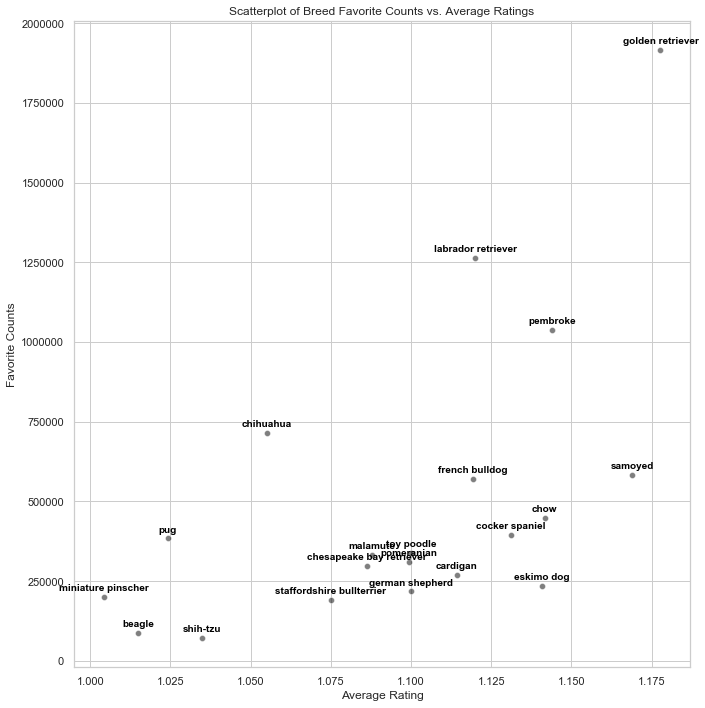

In [111]:
# scatter plot of favorite count on average rating for breeds

with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,10))

    # plot the scatterplot of dog average_rating and favorite_counts
    p1 = sns.scatterplot(x='average_rating', y='favorite_counts', data = df_breed, alpha = 0.5, color = "k", lw = 2)
   
    for line in range(0,df_breed.shape[0]):
        p1.text(df_breed.average_rating[line], df_breed.favorite_counts[line]+20000, 
        df_breed.dog_breed[line], horizontalalignment='center', size='small', color='black', weight='semibold')

    # set the title, legend, x & y labels

    plt.xlabel('Average Rating')
    plt.ylabel('Favorite Counts')
    plt.title('Scatterplot of Breed Favorite Counts vs. Average Ratings')

    plt.tight_layout()

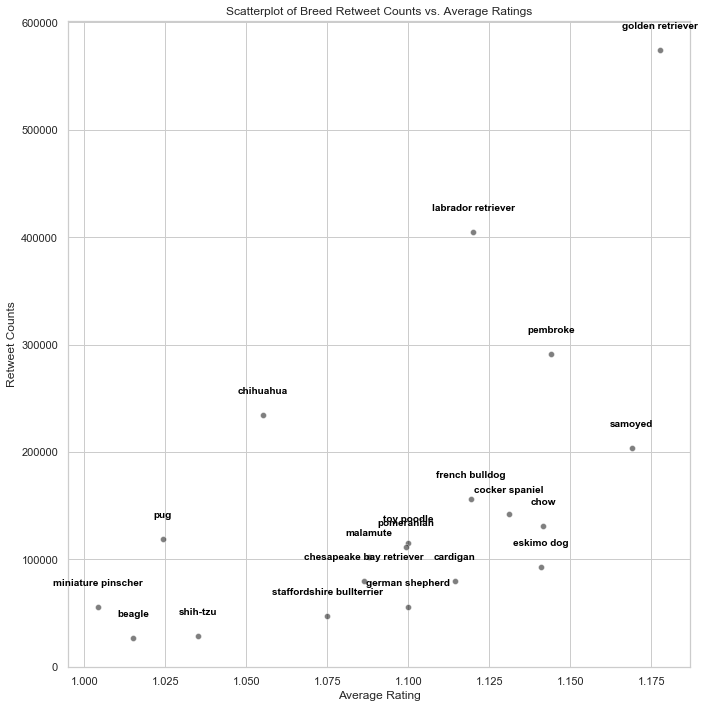

In [112]:
# scatter plot of retweet count on average rating for breeds

with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,10))

    # plot the scatterplot of dog average_rating and retweet_counts
    p1 = sns.scatterplot(x='average_rating', y='retweet_counts', data = df_breed, alpha = 0.5, color = "k", lw = 2)
   
    for line in range(0,df_breed.shape[0]):
        p1.text(df_breed.average_rating[line], df_breed.retweet_counts[line]+20000, 
        df_breed.dog_breed[line], horizontalalignment='center', size='small', color='black', weight='semibold')

    # set the title, legend, x & y labels

    plt.xlabel('Average Rating')
    plt.ylabel('Retweet Counts')
    plt.title('Scatterplot of Breed Retweet Counts vs. Average Ratings')

    plt.tight_layout()

We can see from the two scatterplots above, **the favorite/retweet count is roughly proportional to the average rating of the breed**. the higher the rating, the more likely the post will get more likes and retweets. Among all the breeds, **golden retriever is the most popular breed and gets far more favorites/retweets then expected**.

**6. what is the most liked/retweeted single tweet?**

In [113]:
# find max on favorite count
df_all.iloc[df_all['favorite_count'].idxmax()]

tweet_id              822872901745569793                                                                                             
timestamp             2017-01-21 18:26:02+00:00                                                                                      
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                             
text                  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
expanded_urls         https://twitter.com/dog_rates/status/822872901745569793/photo/1                                                
rating_numerator      13                                                                                                             
rating_denominator    10                                                                                                             
name                  None                                    

In [114]:
# display the dog picture
display(HTML('<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg"/>'))

**The most favorite picture is a a super supportive puppo participating in the Toronto #WomensMarch, and received 132810 favorites.**

In [115]:
# find max on retweet count
df_all.iloc[df_all['retweet_count'].idxmax()]

tweet_id              744234799360020481                                                                                                 
timestamp             2016-06-18 18:26:18+00:00                                                                                          
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                 
text                  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
expanded_urls         https://twitter.com/dog_rates/status/744234799360020481/video/1                                                    
rating_numerator      13                                                                                                                 
rating_denominator    10                                                                                                                 
name                  None        

In [116]:
# display the dog picture
display(HTML('<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg"/>'))

**The most retweeted picture is a doggo that realizes it can stand in a pool (swimming actually), and it received 79515 retweets.** 

**7. what is the average favorite/retweet count on different dog_stage?**

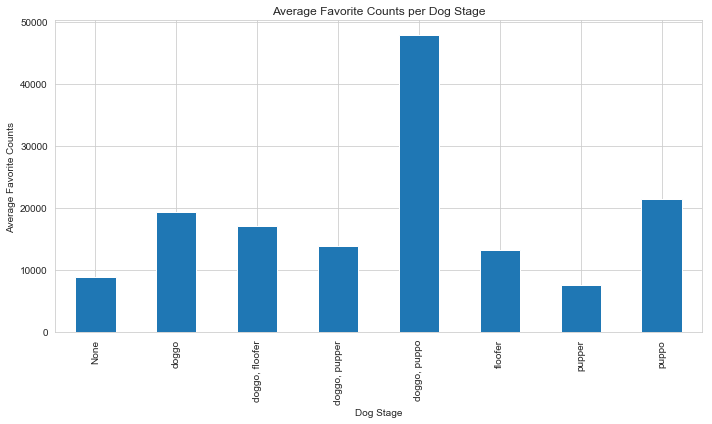

In [118]:
# groupby dog_stage and calculate the mean favorite count
df_stage = df_all_copy.groupby('dog_stage')['favorite_count'].mean()
# visualization
df_stage.plot.bar(figsize = (10, 6))
plt.title('Average Favorite Counts per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Favorite Counts')
plt.tight_layout()

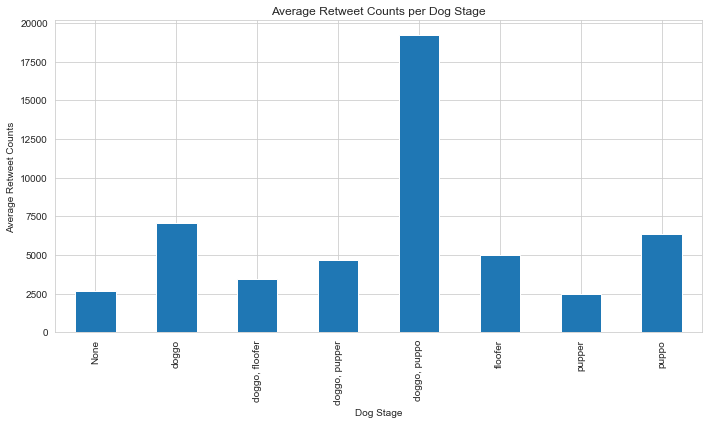

In [119]:
# groupby dog_stage and calculate the mean retweet count
df_stage_2 = df_all_copy.groupby('dog_stage')['retweet_count'].mean()
# visualization
df_stage_2.plot.bar(figsize = (10, 6))
plt.title('Average Retweet Counts per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Retweet Counts')
plt.tight_layout()

**If we consider there are in total only 9 tweets where the dogs have multipe stages, and we exclude them in comparison because these posts might not contain general results, overall, puppo on average gets the most favorite count, doggo on average gets the most retweet count (slightly leading puppo).**

**8. what is the WeRateDogs account activity by year, month, day of the week, hour of the day?**

In [120]:
# use timestamp data, add year, month, day, hour, day_of_week columns
df_all_copy['year'] = df_all_copy["timestamp"].apply(lambda x: x.year)
df_all_copy['month'] = df_all_copy["timestamp"].apply(lambda x: x.month)
df_all_copy['day'] = df_all_copy["timestamp"].apply(lambda x: x.day)
df_all_copy['hour'] = df_all_copy["timestamp"].apply(lambda x: x.hour)
df_all_copy["day_of_week"] = df_all_copy["timestamp"].apply(lambda x: x.dayofweek)

In [121]:
df_all_copy.timestamp.describe()

count     1640                     
unique    1640                     
top       2015-12-08 16:21:41+00:00
freq      1                        
first     2015-11-15 22:32:08+00:00
last      2017-08-01 00:17:27+00:00
Name: timestamp, dtype: object

We can see all the tweets are from **2015/11/15** to **2017/08/01**.

Text(0.5, 1.0, 'Tweet Counts (Month of Year 2015)')

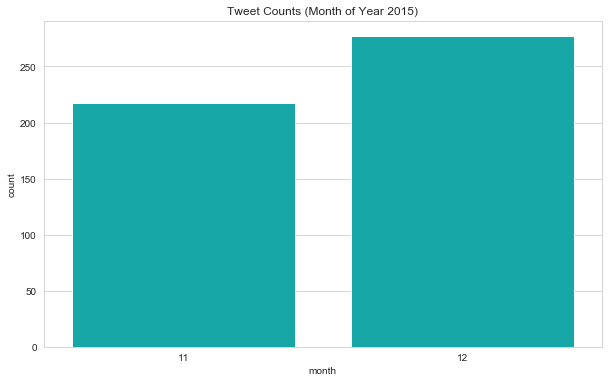

In [122]:
# twitter counts by month in 2015
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "month", data = df_all_copy.query("year == 2015"), color = 'c')
ax.set_title('Tweet Counts (Month of Year 2015)')

Text(0.5, 1.0, 'Tweet Counts (Month of Year 2016)')

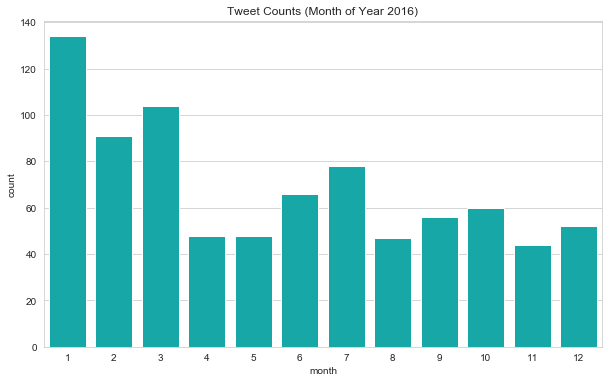

In [123]:
# twitter counts by month in 2016
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "month", data = df_all_copy.query("year == 2016"), color = 'c')
ax.set_title('Tweet Counts (Month of Year 2016)')

Text(0.5, 1.0, 'Tweet Counts (Month of Year 2017)')

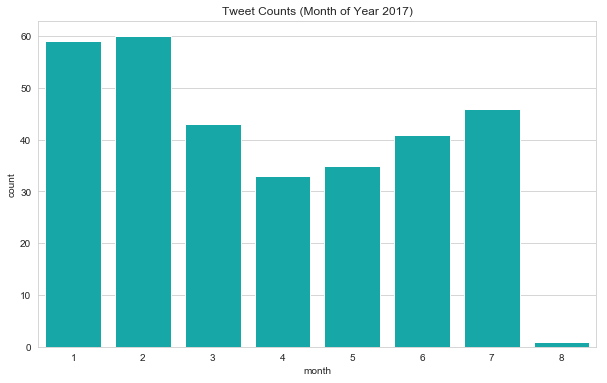

In [124]:
# twitter counts by month in 2017
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "month", data = df_all_copy.query("year == 2017"), color = 'c')
ax.set_title('Tweet Counts (Month of Year 2017)')

**WeRateDogs on average posts more than 200 tweets during November and December in 2015, this number drops for the next 3 months (Jan, Feb, Mar of 2016) with ~100 tweets/month, then drops again and stablizes from April 2016 until July 2017 (averages 40 to 50 tweets a month).**

Text(0.5, 1.0, 'Tweet Counts (Day of Month)')

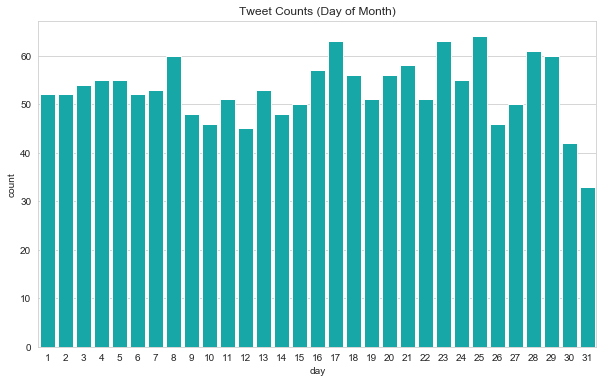

In [125]:
# tweets by day of month
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "day", data = df_all_copy, color = 'c')
ax.set_title('Tweet Counts (Day of Month)')

**The total tweet counts in each day of the month are pretty stable** (fewer tweets on 30 or 31 is because some months don't have the 30th or 31st day).

Text(0.5, 1.0, 'Tweet Counts (Day of Week)')

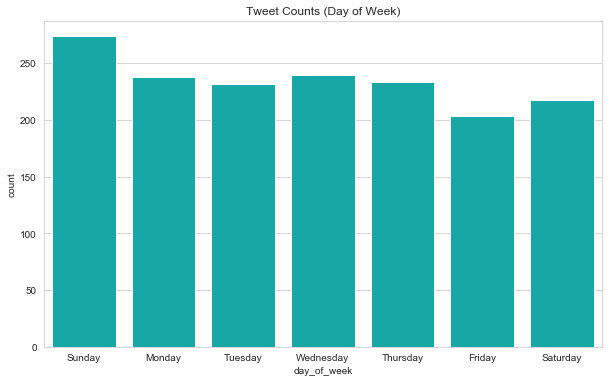

In [126]:
# tweet counts on day of week
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "day_of_week", data = df_all_copy, color = 'c')
ax.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_title('Tweet Counts (Day of Week)')

From the day of week total posts, **WeRateDogs seems to post more tweets on Sunday (with a total post number of ~270) then any other day of the week.**

Text(0.5, 1.0, 'Tweet Counts (Hour of Day)')

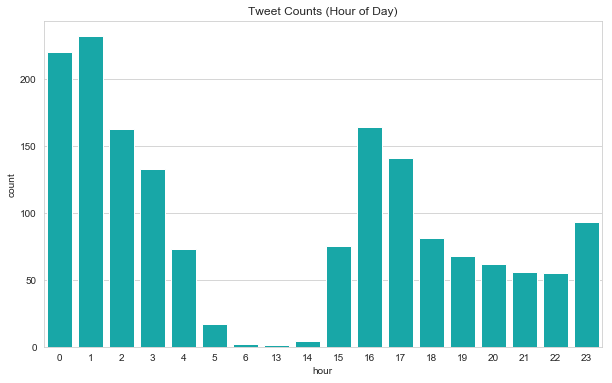

In [127]:
# hour of day post number
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x = "hour", data = df_all_copy, color = 'c')
ax.set_title('Tweet Counts (Hour of Day)')

**More tweets actually come from hours of 0-3 and 16-17, There is no single post for the hours of 7-12 (maybe it's the sleep time for the people who run the account).**

**9. what is the distribution of favorite counts by month in each year?**

In [128]:
# query data from each year and find favorite/retweet counts of each month in these years
df_all_2015 = df_all_copy.query("year == 2015").groupby("month", as_index = False).sum()
df_all_2015 = df_all_2015[['month', 'favorite_count', 'retweet_count']]
df_all_2015.rename(columns={'favorite_count': 'favorite_count_2015', 'retweet_count': 'retweet_count_2015'}, inplace=True)

df_all_2016 = df_all_copy.query("year == 2016").groupby("month", as_index = False).sum()
df_all_2016 = df_all_2016[['month', 'favorite_count', 'retweet_count']]
df_all_2016.rename(columns={'favorite_count': 'favorite_count_2016', 'retweet_count': 'retweet_count_2016'}, inplace=True)

df_all_2017 = df_all_copy.query("year == 2017").groupby("month", as_index = False).sum()
df_all_2017 = df_all_2017[['month', 'favorite_count', 'retweet_count']]
df_all_2017.rename(columns={'favorite_count': 'favorite_count_2017', 'retweet_count': 'retweet_count_2017'}, inplace=True)

# create a monthly count dataframe that stores favorite/retweet counts from each month
df_monthly_count = pd.merge(df_all_2015, df_all_2016, on='month', how='outer')
df_monthly_count = pd.merge(df_monthly_count, df_all_2017, on='month', how='outer')

df_monthly_count.sort_values('month', ascending=True, inplace=True)
df_monthly_count.reset_index(drop = True, inplace = True)
df_monthly_count

,month,favorite_count_2015,retweet_count_2015,favorite_count_2016,retweet_count_2016,favorite_count_2017,retweet_count_2017
0,1,NaN,NaN,491338.0,178155.0,1143224.0,370247.0
1,2,NaN,NaN,362751.0,129548.0,1139249.0,270785.0
2,3,NaN,NaN,464598.0,160181.0,913580.0,219362.0
3,4,NaN,NaN,230346.0,79402.0,754984.0,188230.0
4,5,NaN,NaN,292435.0,101909.0,1033073.0,265131.0
5,6,NaN,NaN,656763.0,289640.0,1207392.0,275568.0
6,7,NaN,NaN,544135.0,193387.0,1465000.0,314508.0
7,8,NaN,NaN,445238.0,144553.0,33819.0,6514.0
8,9,NaN,NaN,618661.0,197830.0,NaN,NaN
9,10,NaN,NaN,791553.0,253481.0,NaN,NaN


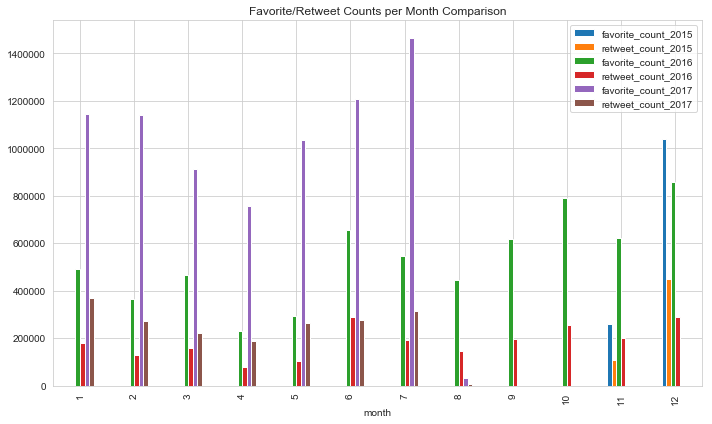

In [129]:
# show monthly favorite/retweet counts and conpare between years
fig, ax = plt.subplots(figsize = (10,6))
ax = df_monthly_count.plot.bar(x='month', ax=ax)
ax.set_title("Favorite/Retweet Counts per Month Comparison")
plt.tight_layout()

**Overall, the account is gaining popularity in receiving favorites and retweets over the years** (we can see increases in height from the green bar to the purple bar showing trend in favorites, red bar to the brown bar showing trend in retweets). The decrease from blue bar to green bar is actually due to different numbers of tweets in the respective months (Dec), we have many more tweets in Dec 2015 than Dec 2016).

## Summary and Conclusion

In this project, I investigated the **twitter data from WeRateDogs**. This project goes through the process of **data gathering, assessing, cleaning and analysis (visualization)**. During the analysis section, I provided and answered 9 interesting questions.